## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
didnt_convert=df.converted[df.converted==0].count()
convert=df.converted[df.converted==1].count()
portion_converted=convert/(didnt_convert+convert)
print ('Portion converted is '+ str(portion_converted*100)+'%.')

Portion converted is 11.9659193556%.


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
print(df.query('group=="treatment" & landing_page!="new_page"').head())
print(df.query('group=="treatment" & landing_page!="new_page"').shape)
print(df.query('group=="control" & landing_page!="old_page"').shape)
1965+1928

     user_id                   timestamp      group landing_page  converted
308   857184  2017-01-20 07:34:59.832626  treatment     old_page          0
327   686623  2017-01-09 14:26:40.734775  treatment     old_page          0
357   856078  2017-01-12 12:29:30.354835  treatment     old_page          0
685   666385  2017-01-23 08:11:54.823806  treatment     old_page          0
713   748761  2017-01-10 15:47:44.445196  treatment     old_page          0
(1965, 5)
(1928, 5)


3893

f. Do any of the rows have missing values?

In [51]:
print(df.info())

print('\nNo missing rows in dataframe.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None

No missing rows in dataframe.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [52]:
ind_01=df.query('group=="treatment" & landing_page!="new_page"').index.tolist()
ind_02=df.query('group=="control" & landing_page!="old_page"').index.tolist()
ind_all=ind_01+ind_02
print('lenght of the mismatch is '+str(len(ind_all)))

df2=df.copy() #create a copy of the orignal dataframe so we can delete the mismatch index
df2.drop(ind_all, inplace=True) #drop the mismatch

print('shape of original dataframe'+str(df.shape))
print('shape of new dataframe after removing mismatch '+str(df2.shape))

lenght of the mismatch is 3893
shape of original dataframe(294478, 5)
shape of new dataframe after removing mismatch (290585, 5)


In [53]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [54]:
print('Total user id in df2 is '+str(len(df2.user_id)))
print('Unique user id in df2 is '+str(df2.user_id.nunique()))

Total user id in df2 is 290585
Unique user id in df2 is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [55]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [56]:
repeated_user_id=df2.user_id[df2.user_id.duplicated()].values[0]
repeated_index=df2[df2.user_id.duplicated()].index.tolist()[0]
print('The repeated user id is '+str(repeated_user_id)+' and index is '+str(repeated_index)+'.')

The repeated user id is 773192 and index is 2893.


c. What is the row information for the repeat **user_id**? 

In [57]:
#show actual locations
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [58]:
df2.drop(repeated_index, inplace=True) #drop the mismatch

In [59]:
#check to confirm the row was dropped
df2.query('user_id==773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [60]:
df2.head() # delete later

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [61]:
print(df2.query('converted==1').converted.count())
print(df2.converted.count())
print(df2.query('converted==1').converted.count()/df2.converted.count())

34753
290584
0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [62]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [63]:
control_df=df2.query('group=="control"')
control_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [64]:
control_df.query('converted==1').user_id.nunique()/control_df.converted.count()

0.1203863045004612

In [41]:
#control_ctr=control_df.query('converted==1').user_id.nunique()/control_df.query('converted==0').user_id.nunique()
#control_ctr

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [65]:
treatment_df=df2.query('group=="treatment"')
treatment_df.query('converted==1').user_id.nunique()/treatment_df.converted.count()

0.11880806551510564

In [38]:
#treatment_df=df2.query('group=="treatment"')
treatment_ctr=treatment_df.query('converted==1').user_id.nunique()/treatment_df.query('converted==0').user_id.nunique()
#treatment_ctr

d. What is the probability that an individual received the new page?

In [66]:
#   total number of new page / total number of users
df2.query('landing_page=="new_page"').user_id.nunique()/df2.user_id.count()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Probability of an individual converting regardless of the page they receive: 0.119.

Given that an individual was in the control group, the probability they converted was 0.12.

Given that an individual was in the treatment group, the probability they converted was 0.119 ~0.12.

Since the probablity of conversion for the control group and treatment group are similar, both group have similar conversion and no one group is better then the other.

We could also bootstrap from control group and treatment group and find the difference and compute the mean of the differnce to be certain.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0:p_{old}-p_{new}>=0 $$     
$$H_1:p_{new}-p_{old}>0 $$

alpha=0.05<br>
To reject the null hypothesis: p<alpha 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [26]:
#under null
p_new=df2.query('converted==1').count()[0]/df2.count()[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
#Assuming success rate of P_n and P_o are equal
p_old=df2.query('converted==1').count()[0]/df2.count()[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [28]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [29]:
print(df2.converted.value_counts())
print(df2.landing_page.value_counts())

0    255831
1     34753
Name: converted, dtype: int64
new_page    145310
old_page    145274
Name: landing_page, dtype: int64


In [30]:
#answer
n_new=df2.landing_page.value_counts()[0]
n_new

145310

d. What is $n_{old}$?

In [31]:
n_old=df2.landing_page.value_counts()[1]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
outcome=[0,1]
new_page_converted=np.random.choice(outcome,n_new, p=(1-p_new,p_new))
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
outcome=[0,1]
old_page_converted=np.random.choice(outcome,n_old, p=(1-p_old,p_old))        
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
old_page_converted_mean=old_page_converted.mean()
new_page_converted_mean=new_page_converted.mean()
new_page_converted_mean-old_page_converted_mean

0.00017663844247428617

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [35]:
p_diffs=[]
size=df2.shape[0]
for _ in range(10000):
    b_samp=df2.sample(size,replace=True)
    old_page_converted=np.random.choice(outcome,n_old, p=(1-p_old,p_old))        
    new_page_converted=np.random.choice(outcome,n_new, p=(1-p_new,p_new))
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

In [36]:
#convert to arrray
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

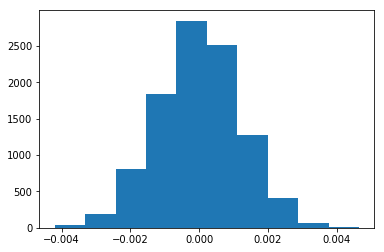

In [37]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
#simulate under normal
null_vals=np.random.normal(0,p_diffs.std(),p_diffs.size)

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [49]:
new_page_convert_rate=df2.query('converted==1 and landing_page=="new_page"').user_id.nunique()/n_new
old_page_convert_rate=df2.query('converted==1 and landing_page=="old_page"').user_id.nunique()/n_old
obs_diff=new_page_convert_rate-old_page_convert_rate
print(obs_diff)

-0.00157823898536


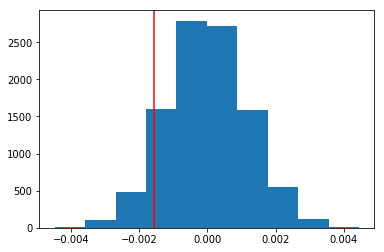

In [51]:
plt.hist(null_vals);
plt.axvline(obs_diff,c='red')

In [52]:
(null_vals > obs_diff).mean()

0.90649999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

p=0.906 <br>
alpha=0.05 <br>
Since p>alpha, we stay with the null.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
'''
import statsmodels.api as sm

convert_old = 
convert_new = 
n_old = 
n_new =
'''

In [96]:
import statsmodels.api as sm


convert_old = df2.query('converted==1 and landing_page=="old_page"').user_id.nunique()
convert_new = df2.query('converted==1 and landing_page=="new_page"').user_id.nunique()
n_old=df2.landing_page.value_counts()[1]
n_new=df2.landing_page.value_counts()[0]

In [97]:
print(n_old)
print(n_new)
print(convert_old)
print(convert_new)

145274
145310
17489
17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [101]:
#sm.stats.proportions_ztest([# of success old,new],[# of trials of old,new])
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative = 'larger')
print('z score is '+ str(z_score))
print('p_value is '+str(p_value))

z score is -1.31092419842
p_value is 0.905058312759


In [105]:
from scipy.stats import norm

print(norm.cdf(z_score))
# 0.0.50131155217 # Tells us how significant our z-score is

print(norm.ppf(1-(0.05/2)))
# 1.959963984540054 # Tells us what our critical value at 95% confidence is

0.094941687241
1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

Under 95% confidence interval, for us to accept the null hypothesis, the z score 
should be between -1.95 and 1.95. Since the z score of -1.31 is between
-1.95 and 1.95, we stay with the null.

The p value 0.905 is similar to 0.906 (simulated under normal in part j). Since the p value is greater than alpha(Type 1 error threshold) of 0.05, we stay with the null.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

Since the outcome is binomial (either 1 or 0), we can use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [67]:
import statsmodels.api as sm

In [69]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [71]:
#ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page']=pd.get_dummies(df['group'])['treatment']
#add intercept column
df2['intercept']=1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [72]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:53:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer**
<br>
Part II : We assume the old page is better than equal to the new page with alpha of 0.05.

$$H_0:P_{old}>=P_{new} $$     
$$H_1:P_{new}>P_{old} $$

alpha=0.05<br>
To reject the null hypothesis: p<alpha <br>
Since p=0.905, and p is greater than alpha, we stay with the null hypothesis that probability of old page could be greater than or equal to probability of new page.

Part III : We assume that the old page is equal to the new page.

$$H_0:P_{old}=P_{new} $$     
$$H_1:P_{old} \ne P_{new} $$

Since p=0.19, and p is greater than alpha, we stay with the null hypothesis that the probabilty of old page is equal to the probabilty of the new page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** <br>
We could consider splitting the time stamp into months, days and hours to have a better understanding about when a particular conversion occurs in a treatment or control group.

Advantages/Disadvantages <br>
Introducing new variables might cause the significance of other values to increase or drecrease depending on the correlation. Correlated variables could decrease the significance of other values while uncorrelated variables could increase the significance.

Reference: https://www.researchgate.net/post/What_does_it_mean_in_a_logistic_regression_model_when_I_add_a_new_variable_and_this_makes_one_of_the_previous_added_variables_loose_significance


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [74]:
countries=pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [76]:
print(df2.shape)
print(countries.shape)

(290584, 7)
(290584, 2)


In [93]:
#https://pandas.pydata.org/pandas-docs/stable/merging.html
#result = pd.merge(left, right, on=['key1', 'key2'])
result_df=pd.merge(df2,countries,on='user_id')
result_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


In [94]:
result_df.shape

(290584, 8)

In [95]:
result_df['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [96]:
result_df[['CA','UK','US']]=pd.get_dummies(result_df['country'])
result_df=result_df.drop('CA',axis=1)
result_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,1


In [97]:
log_mod=sm.Logit(result_df['converted'],result_df[['intercept','ab_page','UK','US']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 03 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        16:37:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [107]:
print(np.exp(results.params))
print('\n')
#for values less than 1, lets reciprocal it for better explanation
print(1/np.exp(results.params))

intercept    0.131332
ab_page      0.985168
UK           1.051944
US           1.041599
dtype: float64


intercept    7.614303
ab_page      1.015056
UK           0.950621
US           0.960062
dtype: float64


Note: to convert odd 'x to percent, x% = ((x-1)*100)
If x<1, expontiatie and then convert to percent for easier explanation
If the coefficent is negative, 

AB Page: The AB Page is coded as where the 'group' is treatment or where the 'landing page' is a new page. For each one unit increase in ab_page or new page, conversion is 0.98 times or 1.5% (1.015-1)*100) more likely to happen while holding everything else constant. p=0.191	, since p<0.05

UK: COnversion is 1.05 times or 5.19% ((1.0519-1)*100) more likely to occur while holding everything else constant.

US: Conversion is 1.041 times or 4.15% ((1.0415-1)*100) more likely to occur while holding everything else constant.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [116]:
result_df['UK_page']=result_df.ab_page*result_df.UK
result_df['US_page']=result_df.ab_page*result_df.US
result_df.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,UK,US,UK_page,US_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,1,0,0


In [117]:
log_mod=sm.Logit(result_df['converted'],result_df[['intercept','ab_page','UK','US','UK_page','US_page']])
results=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [118]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Jun 2018   Pseudo R-squ.:               3.482e-05
Time:                        17:40:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [119]:
print(np.exp(results.params))
print('\n')
#for values less than 1, lets reciprocal it for better explanation
print(1/np.exp(results.params))

intercept    0.134794
ab_page      0.934776
UK           1.011854
US           1.017682
UK_page      1.081428
US_page      1.048001
dtype: float64


intercept    7.418713
ab_page      1.069775
UK           0.988285
US           0.982625
UK_page      0.924703
US_page      0.954198
dtype: float64


Except for the intercept, the rest of the coefficients have a p value greater than 0.05 indicating the values are not statistically significant. Also, none of the z scores for coefficients fall between the 95% confidence interval.

Ab_page (Langing Page): For each one unit decrease in landing page, conversion is 1.07 times as likely while all else is constant. 

UK: Conversion is 1.012 times more likely to occur if the user is from UK while holding everything else constant.

US:  Conversion is 1.018 times more likely to occur if the user is from US while holding everything else constant.

UK Page: Conversion is 1.08 times more likely to occur for interaction between UK and page while holding everything else constant.

US Page: Conversion is 1.05 times more likely to occur for interaction between US and page while holding everything else constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

Reference <br>
http://knowledgetack.com/python/statsmodels/proportions_ztest/

https://www.researchgate.net/post/What_does_it_mean_in_a_logistic_regression_model_when_I_add_a_new_variable_and_this_makes_one_of_the_previous_added_variables_loose_significance


In [1]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0